In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import tkinter as tk
from tkinter import messagebox, simpledialog

In [3]:
df = pd.read_csv('after.csv')
df

,city,location/lat,location/lng,phone,address,reviewsCount,totalScore,state,title,categories,combined_opening_hours
0,Bangli Regency,-8.208182,115.327521,Unknown,"Q8RH+P2C, Jalan Raya, Sukawana, Kintamani, Ban...",956,4.7,Bali,Pura Puncak Penulisan,Hindu temple Tourist attraction,"Monday Open 24 hours, Tuesday Open 24 hours, W..."
1,Gianyar Regency,-8.522814,115.263757,+62 361 976659,"Jl. Raya Pengosekan Ubud, Ubud, Kecamatan Ubud...",1111,4.5,Bali,Agung Rai Museum of Art,Art museum Museum Tourist attraction,"Monday 9 AM to 6 PM, Tuesday 9 AM to 6 PM, Wed..."
2,Badung Regency,-8.723268,115.169805,+62 811-3882-683,"75G9+MWV, Jl. Pantai Kuta, Kuta, Kec. Kuta, Ka...",272,4.4,Bali,Bali Sea Turtle Society,Non-profit organization Conservation departmen...,
3,Tabanan Regency,-8.302095,115.158773,+62 821-4520-0103,"Br. Batusesa, Candikuning, Baturiti, Tabanan R...",4124,4.6,Bali,The Blooms Garden,Tourist attraction Hotel Restaurant Villa,
4,Karangasem Regency,-8.483013,115.617342,+62 878-6009-5999,"Subagan, Karangasem, Karangasem Regency, Bali ...",867,3.8,Bali,Bali Chocolate Factory,Tourist attraction Event ticket seller,"Monday 7 AM to 8 PM, Tuesday 7 AM to 8 PM, Wed..."
...,...,...,...,...,...,...,...,...,...,...,...
522,Surabaya,-7.242472,112.764074,+62 855-3693-0624,Kapas lor 1G 2C.Selisih 1 Rumah dari Pukesmas ...,2,5.0,East Java,KOS VITRI CABANG 2,Vacation home rental agency,"Monday 6 AM to 10 PM, Tuesday 6 AM to 10 PM, W..."
523,Surabaya,-7.278716,112.733048,+62 31 5682388,"Jl. R.A Kartini No.123 D, DR. Soetomo, Kec. Te...",7,5.0,East Java,Infinite Vacation,Travel agency,"Monday 8:30 AM to 4:30 PM, Tuesday 8:30 AM to ..."
524,Surabaya,-7.257885,112.732266,+62 31 99246060,"Jl. Tidar No.20A Lantai 2, RT.003/RW.07, Sawah...",1,3.0,East Java,WIJAYA VACATION,Travel agency,"Monday 10 AM to 5:30 PM, Tuesday 10 AM to 5:30..."
525,Surabaya,-7.261511,112.768591,+62 31 9999992,"Jl. Kalikepiting Jaya IX No.41 016, RT.016/RW....",0,4.7,East Java,Vacation Journey,Indoor lodging,


In [4]:
# conten based
categories = df['title'] + ' ' + df['city'] + ' ' + df['state'] + ' ' + df['state'] + ' ' + df['categories']

In [5]:
null_counts = categories.isnull().sum()
print(null_counts)

2


In [6]:
categories = categories.fillna("Unknown")

In [7]:
filtered_df = df[df.apply(lambda row: row.astype(str).str.contains('Kintamani', case=False, na=False).any(), axis=1)]

# Display the filtered DataFrame
print(filtered_df)

               city  location/lat  location/lng              phone  \
0    Bangli Regency     -8.208182    115.327521            Unknown   
128  Bangli Regency     -8.287926    115.254220  +62 819-3620-2062   

                                               address  reviewsCount  \
0    Q8RH+P2C, Jalan Raya, Sukawana, Kintamani, Ban...           956   
128  Jl. Pura Dalem No.8, Mengani, Kec. Kintamani, ...             2   

     totalScore state                         title  \
0           4.7  Bali         Pura Puncak Penulisan   
128         5.0  Bali  Lotus Vacation ( MSM grups )   

                          categories  \
0    Hindu temple Tourist attraction   
128                    Travel agency   

                                combined_opening_hours  
0    Monday Open 24 hours, Tuesday Open 24 hours, W...  
128  Monday Open 24 hours, Tuesday Open 24 hours, W...  


In [8]:
null_counts = categories.isnull().sum()
print(null_counts)

0


In [9]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(categories)
tfidf_matrix.shape

(527, 990)

In [10]:
sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)
sim_matrix

array([[1.        , 0.06846045, 0.0970417 , ..., 0.        , 0.        ,
        0.        ],
       [0.06846045, 1.        , 0.05967401, ..., 0.        , 0.        ,
        0.        ],
       [0.0970417 , 0.05967401, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.43376203,
        0.35387054],
       [0.        , 0.        , 0.        , ..., 0.43376203, 1.        ,
        0.30041222],
       [0.        , 0.        , 0.        , ..., 0.35387054, 0.30041222,
        1.        ]])

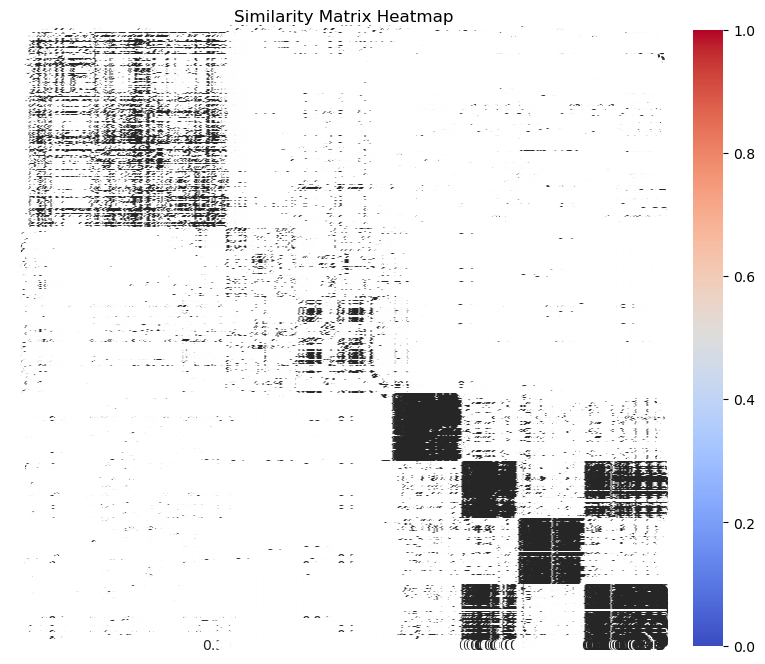

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sim_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Similarity Matrix Heatmap')
plt.show()

In [10]:
post_map = pd.Series(df.index, index=df['title'])
post_map

title
Pura Puncak Penulisan        0
Agung Rai Museum of Art      1
Bali Sea Turtle Society      2
The Blooms Garden            3
Bali Chocolate Factory       4
                          ... 
KOS VITRI CABANG 2         522
Infinite Vacation          523
WIJAYA VACATION            524
Vacation Journey           525
Po Vacationbus             526
Length: 527, dtype: int64

In [11]:
# #Fungsi rekomendasi film berdasarkan genr
# def recommended_movies_based_on_genre(title,like):
#     #ambil index dari film yg diinputkan
#     movie_id = post_map[title]
#     #hitung skor kemiripan
#     sim_score = list(enumerate(similarity[movie_id]))
#     #urutkan 
#     sim_score = sorted(sim_score,key=lambda x:x[1], reverse=like)
#     #Ambil 10 teratas
#     sim_score = sim_score[1:10]
#     #Ambil index dari 10 film teratas
#     movie_indices = [i[0] for i in sim_score]
#     #Kembalikan judul filmnya
#     return df['title'].iloc[movie_indices]

# def recommended_spot_based_on_likes(title, like):
#     # Ambil index dari film yang diinputkan
#     movie_id = post_map[title]
#     # Hitung skor kemiripan
#     sim_score = list(enumerate(sim_matrix[movie_id]))
#     # Urutkan
#     sim_score = sorted(sim_score, key=lambda x: x[1], reverse=like)
#     # Ambil 10 teratas
#     sim_score = sim_score[1:10]
#     # Ambil index dari 10 film teratas
#     movie_indices = [i[0] for i in sim_score]
#     # Kembalikan judul filmnya bersama dengan skor kemiripan, city, dan state
#     return df[['title', 'city', 'state']].iloc[movie_indices], [i[1] for i in sim_score]


In [12]:
def get_recommendations(title, seen_titles, cosine_sim=sim_matrix):
    idx = df.index[df['title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:]
    spot_indices = [i[0] for i in sim_scores if df.iloc[i[0]]['title'] not in seen_titles]
    return df.iloc[spot_indices[:10]], [x[1] for x in sim_scores[:10]]

In [13]:
# recommended_spot_based_on_likes('Agung Rai Museum of Art', True)

In [14]:
# current_title = "Puri Agung Denpasar"


# while True:
#     # Assume you have a function to randomly select a movie title
#     print("Spot Name:", current_title, "\n")
#     feedback = input("Did you like this tourist attraction? (yes/no): ").lower()        
#     if feedback == 'yes':
#         like = True
#     elif feedback == 'no':
#         like = False
#     else:
#         print("Invalid input. Please enter 'yes' or 'no'.")
#         continue
        
#     recommendations, similarity_scores = recommended_spot_based_on_likes(current_title, like)
        
#     print("\nRecommended Spot:")
#     print(recommendations)
        
#     # Assuming you want to display similarity scores as well
#     print("\nSimilarity Scores:")
#     print(similarity_scores)
    
#     choice = input("\nDo you want to continue? (yes/no): ").lower()
#     current_title = recommendations.iloc[0]['title']
#     if choice != 'yes':
#         print("Exiting the system.")
#         break

In [15]:
current_title = "Pura Puncak Penulisan"
user_feedback = {}
seen_titles = set([current_title])

In [16]:
def display_recommendations(recommendations):
    result = "\nRecommended Spots:\n"
    for idx, spot in recommendations.iterrows():
        result += f"{idx + 1}. {spot['title']} (Score: {spot['totalScore']}, Reviews: {spot['reviewsCount']}, City: {spot['city']})\n"
    return result

In [17]:
def get_recommendations_and_feedback():
    global current_title
    global seen_titles

    while True:
        feedback = simpledialog.askinteger("Input", f"Rate the tourist attraction '{current_title}' on a scale of 1-5 (1: Dislike, 5: Like):")
        if feedback is None:
            if messagebox.askyesno("Exit", "Do you want to exit?"):
                root.destroy()
                return
            else:
                continue  # Continue the loop to ask for feedback again

        if feedback < 1 or feedback > 5:
            messagebox.showerror("Error", "Invalid input. Please enter a number between 1 and 5.")
            continue  # Continue the loop to ask for feedback again

        user_feedback[current_title] = feedback
        recommendations, similarity_scores = get_recommendations(current_title, seen_titles)
        recommendations_text = display_recommendations(recommendations)
        
        continue_recommendation = messagebox.askquestion("Continue", recommendations_text + "\nDo you want to continue?", icon='question')
        if continue_recommendation == 'no':
            root.destroy()
            return

        current_title = recommendations.iloc[0]['title']
        seen_titles.add(current_title)

In [ ]:
root = tk.Tk()
root.withdraw()  # Hide the main window

# Start the recommendation system
get_recommendations_and_feedback()

# Run the GUI event loop
root.mainloop()